In [11]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
from show import imshow

<span style="font-family: 'Montserrat', sans-serif; font-size: 2em;">
En esta parte el programa lee una imagen a color y la convierte a escala de grises.
</span>

In [72]:
Im = cv2.imread('sala.jpeg')
Im4 = cv2.imread('dolphy.jpeg')
Im5 = cv2.imread('yo1.jpeg')

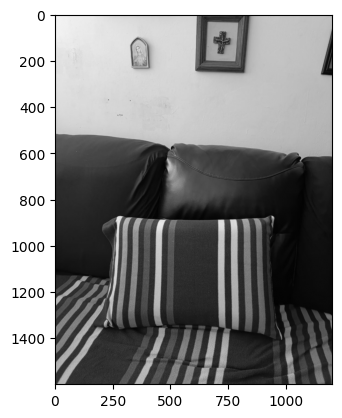

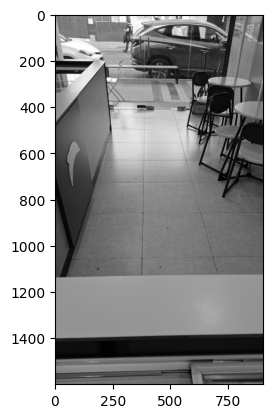

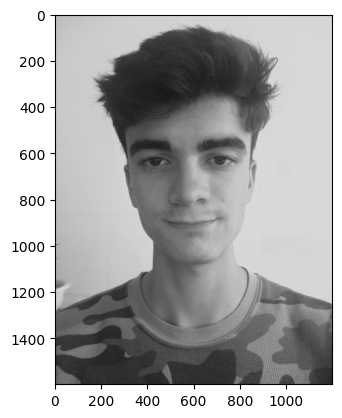

In [74]:
ImG=Im.copy()
Irg=cv2.cvtColor(ImG, cv2.COLOR_BGR2GRAY)
plt.imshow(Irg, cmap='gray', vmin=0, vmax=255)
plt.show()

ImG2=Im4.copy()
Irg2=cv2.cvtColor(ImG2, cv2.COLOR_BGR2GRAY)
plt.imshow(Irg2, cmap='gray', vmin=0, vmax=255)
plt.show()

ImG3=Im5.copy()
Irg3=cv2.cvtColor(ImG3, cv2.COLOR_BGR2GRAY)
plt.imshow(Irg3, cmap='gray', vmin=0, vmax=255)
plt.show()

<span style="font-family: 'Montserrat', sans-serif; font-size: 1.5em;">
histograma normalizado, separado en quintillas y con su tipo de imagen 
</span>

La imagen esta subexpuesta


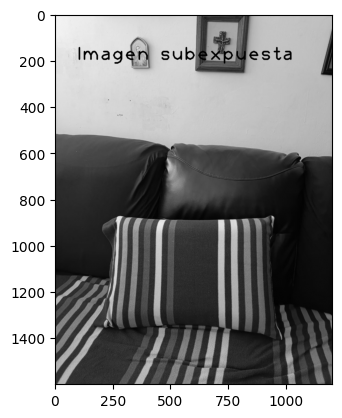

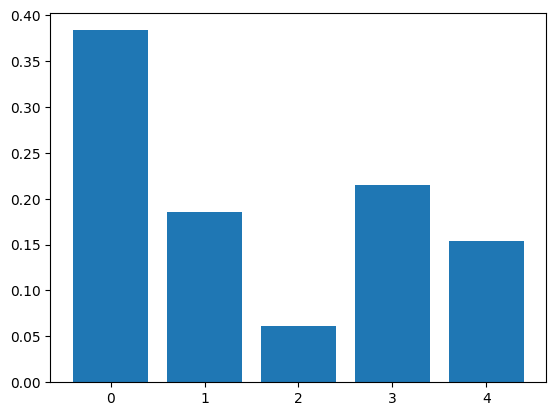

La imagen esta normal o normalizada ya que no esta ni sobreexpuesta ni subexpuesta


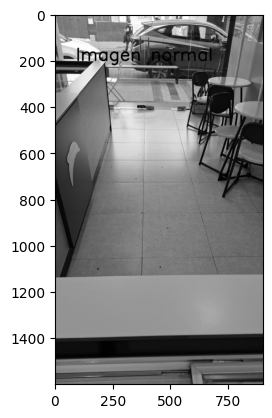

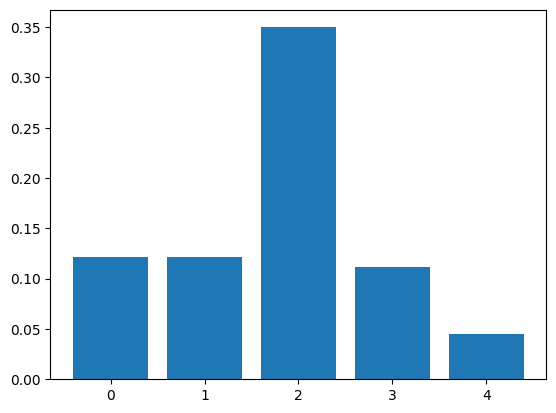

La imagen esta sobreexpuesta


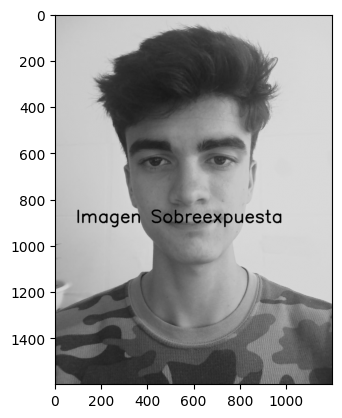

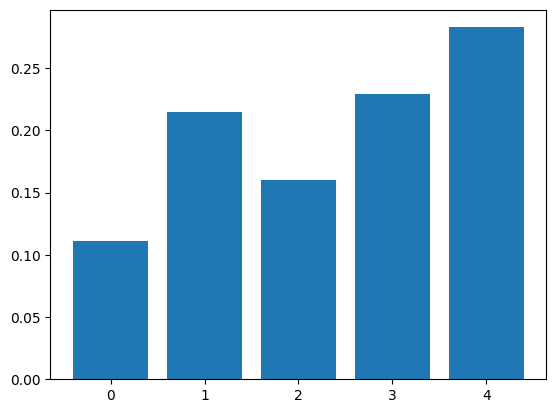

In [82]:
%matplotlib inline
Im1=Irg.copy()
M,N = Im1.shape
hist = cv2.calcHist([Im1],[0],None,[5],[0,256]).flatten()/(M*N)

max_val = np.argmax(hist)
if max_val == 4 and hist[4]  > 0.3:
    print("La imagen esta sobreexpuesta")
    cv2.putText(Im1, ' Imagen Sobreexpuesta', (50,200), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
    plt.imshow(Im1, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist)
    plt.show()
elif max_val == 0 and hist[0] > 0.3:
    print("La imagen esta subexpuesta")
    cv2.putText(Im1, ' Imagen subexpuesta ', (50,200), cv2.FONT_HERSHEY_PLAIN, 5.5, (0,0,255), 5)
    plt.imshow(Im1, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist)
    plt.show()
else :
    print("La imagen esta normal o normalizada ya que no esta ni sobreexpuesta ni subexpuesta")
    cv2.putText(Im1, ' Imagen normal ', (50,200), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
    plt.imshow(Im1, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist)
    plt.show()

#Imagen 2

Im2=Irg2.copy()
M2,N2 = Im2.shape
hist2 = cv2.calcHist([Im2],[0],None,[5],[0,256]).flatten()/(M*N)

max_val2 = np.argmax(hist2)
if max_val2 == 4 and hist2[4]  > 0.3:
    print("La imagen esta sobreexpuesta")
    cv2.putText(Im2, ' Imagen Sobreexpuesta', (50,200), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
    plt.imshow(Im2, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist2)
    plt.show()
elif max_val2 == 0 and hist2[0] > 0.3:
    print("La imagen esta subexpuesta")
    cv2.putText(Im2, ' Imagen subexpuesta ', (50,200), cv2.FONT_HERSHEY_PLAIN, 5.5, (0,0,255), 5)
    plt.imshow(Im2, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist2)
    plt.show()
else :
    print("La imagen esta normal o normalizada ya que no esta ni sobreexpuesta ni subexpuesta")
    cv2.putText(Im2, ' Imagen normal ', (50,200), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
    plt.imshow(Im2, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist2)
    plt.show()

#imagen 3 

Im3=Irg3.copy()
M3,N3 = Im3.shape
hist3 = cv2.calcHist([Im3],[0],None,[5],[0,256]).flatten()/(M*N)

max_val3 = np.argmax(hist3)
if max_val3 == 4 and hist3[4]  > 0.2:
    print("La imagen esta sobreexpuesta")
    cv2.putText(Im3, ' Imagen Sobreexpuesta', (50,900), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
    plt.imshow(Im3, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist3)
    plt.show()
elif max_val3 == 0 and hist3[0] > 0.2:
    print("La imagen esta subexpuesta")
    cv2.putText(Im3, ' Imagen subexpuesta ', (50,900), cv2.FONT_HERSHEY_PLAIN, 5.5, (0,0,255), 5)
    plt.imshow(Im3, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist3)
    plt.show()
else :
    print("La imagen esta normal o normalizada ya que no esta ni sobreexpuesta ni subexpuesta")
    cv2.putText(Im3, ' Imagen normal ', (50,900), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
    plt.imshow(Im3, cmap='gray', vmin=0, vmax=255)
    plt.show()
    plt.bar(range(5), hist3)
    plt.show()


<span style="font-family: 'Montserrat', sans-serif; font-size: 2em;">
Imagen ecualizada
</span>

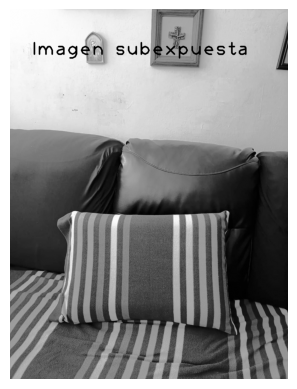

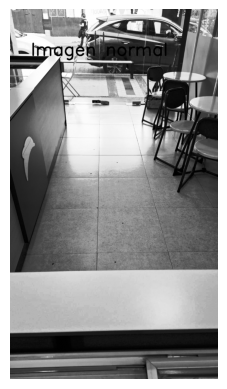

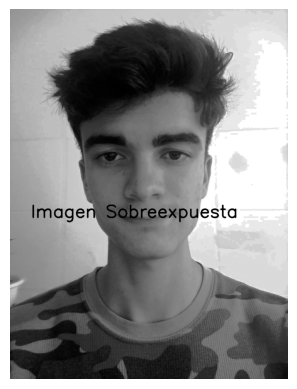

In [84]:
#Imagen 1


hist = cv2.calcHist([Im1], [0], None, [256], [0,256]).flatten() / (M*N)
FA = np.cumsum(hist)
Ime = np.zeros_like(Im1)
M,N = Im1.shape

for i in range(M):
    for j in range(N):
        color = Im1[i, j]
        nuevo_color = int(255 * FA[color])
        Ime[i, j] = nuevo_color

imshow(Ime)

#Imagen 2

hist2 = cv2.calcHist([Im2], [0], None, [256], [0,256]).flatten() / (M2*N2)
FA2 = np.cumsum(hist2)
Ime2 = np.zeros_like(Im2)
M2,N2 = Im2.shape

for i in range(M2):
    for j in range(N2):
        color2 = Im2[i, j]
        nuevo_color2 = int(255 * FA2[color2])
        Ime2[i, j] = nuevo_color2

imshow(Ime2)

#Imagen 3

hist3 = cv2.calcHist([Im3], [0], None, [256], [0,256]).flatten() / (M3*N3)
FA3 = np.cumsum(hist3)
Ime3 = np.zeros_like(Im3)
M3,N3 = Im3.shape

for i in range(M3):
    for j in range(N3):
        color3 = Im3[i, j]
        nuevo_color3 = int(255 * FA3[color3])
        Ime3[i, j] = nuevo_color3

imshow(Ime3)


<span style="font-family: 'Montserrat', sans-serif; font-size: 2em;">
Imagen con mis iniciales</span>

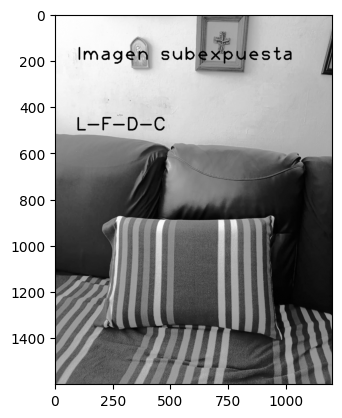

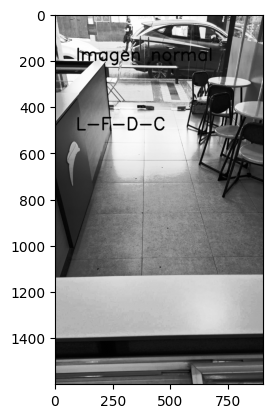

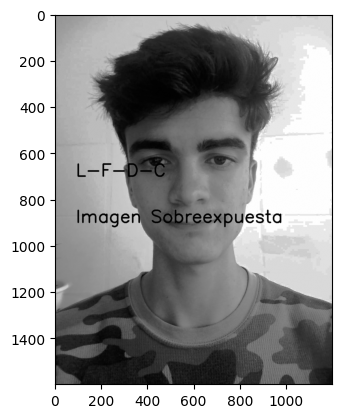

In [85]:
#Imagen 1

Im6 = Ime.copy()
cv2.putText(Im6, ' L-F-D-C ', (50,500), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
plt.imshow(Im6, cmap='gray', vmin=0, vmax=255)
plt.show()

#Imagen 2

Im7 = Ime2.copy()
cv2.putText(Im7, ' L-F-D-C ', (50,500), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
plt.imshow(Im7, cmap='gray', vmin=0, vmax=255)
plt.show()

#Imagen 3

Im8 = Ime3.copy()
cv2.putText(Im8, ' L-F-D-C ', (50,700), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (0,0,255), 5)
plt.imshow(Im8, cmap='gray', vmin=0, vmax=255)
plt.show()